In [48]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install keras
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import Sequential
print('All Needed Packages Installed')

Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in indexes: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
Looking in links: https://nexus-commons.apps.ocp4dev.av.ae.ge.com/repository/pypi-hosted/simple
All Needed Packages Installed


In [8]:
loadData = pd.read_excel('Documents/MISO_Central_Load.xlsx')
loadData.head()


,DTTM,Forecast,Actual
0,2017-01-01 01:00:00,33932,33851.44
1,2017-01-01 02:00:00,33806,33072.33
2,2017-01-01 03:00:00,33645,32415.59
3,2017-01-01 04:00:00,33417,32088.82
4,2017-01-01 05:00:00,33527,32108.70


In [9]:
loadData.describe()

,Forecast,Actual
count,26279.000000,26279.000000
mean,39968.864493,39591.571482
std,6488.516953,6523.880196
min,26867.000000,26475.450000
25%,35397.000000,34883.060000
50%,39113.000000,38789.620000
75%,43330.500000,43131.455000
max,91034.000000,65537.790000


In [12]:
model = RandomForestRegressor(n_estimators = 100)

In [44]:
features = pd.DataFrame([])
features['hour'] = loadData.DTTM.dt.hour
features['dayOfYear'] = loadData.DTTM.dt.dayofyear
features['dayOfWeek'] = loadData.DTTM.dt.dayofweek
features.head()

,hour,dayOfYear,dayOfWeek
0,1,1,6
1,2,1,6
2,3,1,6
3,4,1,6
4,5,1,6


In [15]:
target = loadData.Actual

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

Average Absolute Hourly Miss: 3.5487064510938446 %


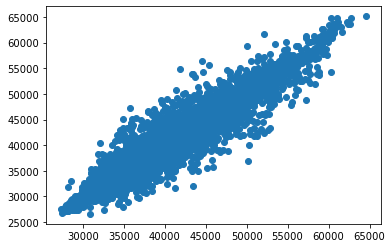

In [46]:
trainedModel = model.fit(X_train, Y_train)
prediction = trainedModel.predict(X_test)
mae = 100*sum(abs(prediction - Y_test))/sum(Y_test)
print(f'Average Absolute Hourly Miss: {mae} %')
plt.scatter(prediction, Y_test)